Zadanie 1

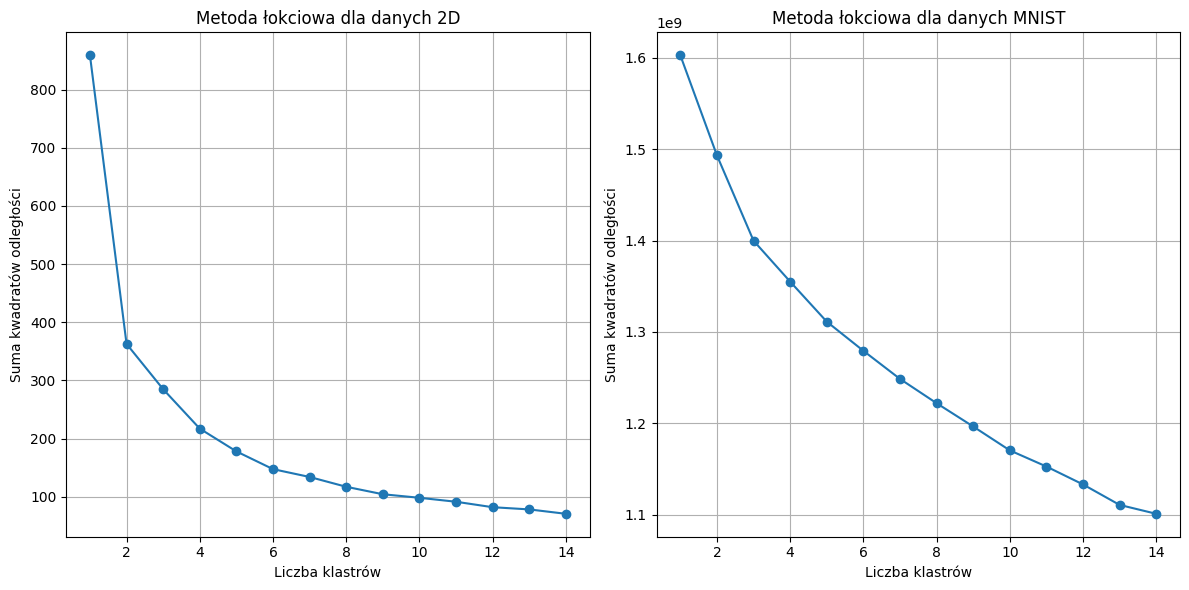

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def read_data(file_path):
    try:
        return pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: The file {file_path} does not exist.")
        return None

def calculate_sse(data, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    return sse

def plot_sse(sse, title, k_range):
    plt.plot(k_range, sse, marker='o')
    plt.title(title)
    plt.xlabel('Liczba klastrów')
    plt.ylabel('Suma kwadratów odległości')
    plt.grid(True)

data_2d = read_data("data_2d.csv")
mnist = read_data("mnist.csv")

if data_2d is not None and mnist is not None:
    k_range = range(1, 15)
    sse_2d = calculate_sse(data_2d, k_range)
    sse_mnist = calculate_sse(mnist, k_range)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plot_sse(sse_2d, 'Metoda łokciowa dla danych 2D', k_range)
    plt.subplot(1, 2, 2)
    plot_sse(sse_mnist, 'Metoda łokciowa dla danych MNIST', k_range)
    plt.tight_layout()
    plt.show()

Zadanie 2

In [ ]:
import logging
from sklearn.decomposition import PCA


logging.basicConfig(level=logging.INFO)


def perform_pca(data, n_components=2):
    """Perform PCA on the given dataset."""
    logging.info("Performing PCA")
    pca = PCA(n_components=n_components)
    return pca.fit_transform(data)

def perform_clustering(data, n_clusters, random_state=42):
    """Cluster the data using KMeans."""
    logging.info("Performing KMeans Clustering")
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    return kmeans.fit_predict(data)

def visualize_clusters(data, labels, title, cmap='viridis', point_size=20, alpha=0.5):
    """Visualize data clusters."""
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap, s=point_size, alpha=alpha)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar(label='Cluster')
    plt.show()


labels_2d = perform_clustering(data_2d, n_clusters=2)
visualize_clusters(data_2d, labels_2d, '2D Data Clustering')


data_mnist_pca = perform_pca(mnist)
labels_mnist = perform_clustering(data_mnist_pca, n_clusters=3)
visualize_clusters(data_mnist_pca, labels_mnist, 'MNIST Data Clustering after PCA')